<a href="https://colab.research.google.com/github/alvaro-salgado/PCD_MCD/blob/main/PCD_Participaci%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Participación Clase 1
### Álvaro Salgado

 Una de dos:

- Aplicar la técnica de _stem_ o lematización para analizar la frecuencia de palabras de esta obra
- Implementar una manera de obtener la frecuencia de $n$-gramas de cualquier obra antes de que se acabe la clase. Subir la solución propuesta al repositorio

#### Obtener el libro Moby-Dick


In [2]:
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 7.6 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=e105e76e6631faa727d235f0d3b681cdf6c31ac7513d866b96f4d2fce8de8784
  Stored in directory: /root/.cache/pip/wheels/1b/fa/c3/4c14e72101070c40b56c2bfb4617e510e68f121e4f736a5d2a
Successfully built httpsproxy-urllib2


In [3]:
import gutenbergpy.textget

In [4]:
def obtener_libro(id = 2701):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [5]:
libro_limpio, libro = obtener_libro()

In [6]:
str_libro = libro_limpio.decode()
str_libro[:1000]

'\n\n\n\nMOBY-DICK;\n\nor, THE WHALE.\n\nBy Herman Melville\n\n\n\nCONTENTS\n\nETYMOLOGY.\n\nEXTRACTS (Supplied by a Sub-Sub-Librarian).\n\nCHAPTER 1. Loomings.\n\nCHAPTER 2. The Carpet-Bag.\n\nCHAPTER 3. The Spouter-Inn.\n\nCHAPTER 4. The Counterpane.\n\nCHAPTER 5. Breakfast.\n\nCHAPTER 6. The Street.\n\nCHAPTER 7. The Chapel.\n\nCHAPTER 8. The Pulpit.\n\nCHAPTER 9. The Sermon.\n\nCHAPTER 10. A Bosom Friend.\n\nCHAPTER 11. Nightgown.\n\nCHAPTER 12. Biographical.\n\nCHAPTER 13. Wheelbarrow.\n\nCHAPTER 14. Nantucket.\n\nCHAPTER 15. Chowder.\n\nCHAPTER 16. The Ship.\n\nCHAPTER 17. The Ramadan.\n\nCHAPTER 18. His Mark.\n\nCHAPTER 19. The Prophet.\n\nCHAPTER 20. All Astir.\n\nCHAPTER 21. Going Aboard.\n\nCHAPTER 22. Merry Christmas.\n\nCHAPTER 23. The Lee Shore.\n\nCHAPTER 24. The Advocate.\n\nCHAPTER 25. Postscript.\n\nCHAPTER 26. Knights and Squires.\n\nCHAPTER 27. Knights and Squires.\n\nCHAPTER 28. Ahab.\n\nCHAPTER 29. Enter Ahab; to Him, Stubb.\n\nCHAPTER 30. The Pipe.\n\nCHAPTER 31. 

In [7]:
list_libro = str_libro.split("\n")
list_libro[:20]

['',
 '',
 '',
 '',
 'MOBY-DICK;',
 '',
 'or, THE WHALE.',
 '',
 'By Herman Melville',
 '',
 '',
 '',
 'CONTENTS',
 '',
 'ETYMOLOGY.',
 '',
 'EXTRACTS (Supplied by a Sub-Sub-Librarian).',
 '',
 'CHAPTER 1. Loomings.',
 '']

In [8]:
libro_filitrado = list(filter(None, list_libro))
libro_filitrado[:20]

['MOBY-DICK;',
 'or, THE WHALE.',
 'By Herman Melville',
 'CONTENTS',
 'ETYMOLOGY.',
 'EXTRACTS (Supplied by a Sub-Sub-Librarian).',
 'CHAPTER 1. Loomings.',
 'CHAPTER 2. The Carpet-Bag.',
 'CHAPTER 3. The Spouter-Inn.',
 'CHAPTER 4. The Counterpane.',
 'CHAPTER 5. Breakfast.',
 'CHAPTER 6. The Street.',
 'CHAPTER 7. The Chapel.',
 'CHAPTER 8. The Pulpit.',
 'CHAPTER 9. The Sermon.',
 'CHAPTER 10. A Bosom Friend.',
 'CHAPTER 11. Nightgown.',
 'CHAPTER 12. Biographical.',
 'CHAPTER 13. Wheelbarrow.',
 'CHAPTER 14. Nantucket.']

#### Eliminar Stopwords


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
def tokens(txt, idioma = 'english'):
    texto_limpio = re.sub(r'[^\w\s]', '', txt.lower())

    stop_words = set(stopwords.words(idioma))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [11]:
map_libro = list(map(tokens, libro_filitrado))

In [12]:
tokens = []
for token in map_libro:
    tokens.extend(token)
tokens[:20]

['mobydick',
 'whale',
 'herman',
 'melville',
 'contents',
 'etymology',
 'extracts',
 'supplied',
 'subsublibrarian',
 'chapter',
 '1',
 'loomings',
 'chapter',
 '2',
 'carpetbag',
 'chapter',
 '3',
 'spouterinn',
 'chapter',
 '4']

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(tokens)
df

,0
0,mobydick
1,whale
2,herman
3,melville
4,contents
...,...
109366,missing
109367,children
109368,found
109369,another


In [15]:
conteo_frecuencias = df.value_counts()
conteo_frecuencias

,count
0,
whale,950
one,890
like,575
upon,565
old,440
...,...
comets,1
mothered,1
motherit,1


In [18]:
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['token', 'conteo']
df_frecuencias

,token,conteo
0,whale,950
1,one,890
2,like,575
3,upon,565
4,old,440
...,...,...
20130,comets,1
20131,mothered,1
20132,motherit,1
20133,cometheir,1


In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

palabras =tokens

stemmed_words = [ps.stem(palabra) for palabra in palabras]
stemmed_words [:10]

['mobydick',
 'whale',
 'herman',
 'melvil',
 'content',
 'etymolog',
 'extract',
 'suppli',
 'subsublibrarian',
 'chapter']

In [27]:
lemmatized_words = [lemmatizer.lemmatize(palabra) for palabra in palabras]
lemmatized_words[:10]

['mobydick',
 'whale',
 'herman',
 'melville',
 'content',
 'etymology',
 'extract',
 'supplied',
 'subsublibrarian',
 'chapter']

In [28]:
lemmatized_df = pd.DataFrame(lemmatized_words)
lemmatized_df

,0
0,mobydick
1,whale
2,herman
3,melville
4,content
...,...
109366,missing
109367,child
109368,found
109369,another


In [40]:
lemmatized_count = lemmatized_df.value_counts()
lemmatized_count = lemmatized_count.to_frame()
lemmatized_count.reset_index(inplace = True)
lemmatized_count.columns = ['token', 'conteo']
lemmatized_count

,token,conteo
0,whale,1346
1,one,919
2,like,578
3,upon,565
4,ship,538
...,...,...
18036,imago,1
18037,imbecile,1
18038,imbecility,1
18039,imbibing,1


In [31]:
import matplotlib.pyplot as plt

In [34]:
lemmatized_count.shape

(18041,)

Text(0.5, 0, 'Token')

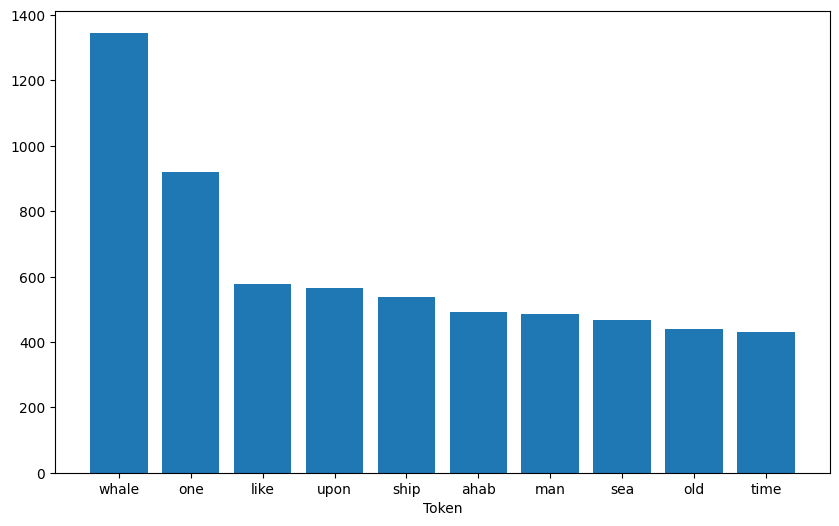

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(lemmatized_count['token'][:10], lemmatized_count['conteo'][:10])
plt.xlabel('Token')